Santiago Quiroz Upegui cc: 1036678350. Grupo 1

SIMULACIÓN DE SISTEMAS - 3007331

PRÁCTICA # 2 -


Problema de la reserva de un hotel:
Un hotel tiene 100 habitaciones que alquila a  125 mil la noche. Existe un costo variable entre
10.000 y $30.000 por habitación (aseo, artículos de baño, etc.) por cada noche que está ocupada.
Por cada reservación aceptada, existe una probabilidad del 5%, que el cliente no llegue. Si el hotel
se excede en las reservaciones, hay un costo de 200.000 para compensar a los clientes cuyas
reservaciones no pueden garantizarse.

In [2]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

PASOS:

1. Definir que es temporada alta 

2. Definir un rango para las variables de decision (#reservas a realizar para maximizar su utilidad diaria) 

3. Simular 1000 veces la utilidad diaria del hotel con base en las variables de decision 

4. declarar variables necesarias, que es utilidad(utilidad por habitacion = ingreso alquiler costos variables.... utilidad diaria... costo de indemnizacion)

5. Analizar si a raiz de una reserva el cliente llega o no ... (usar un numero aleatorio para poder asignar la probabilidad de que llegue o no)

6. Si el cliente llega y se tienen las habitaciones ocupadas -> calcular el costo de indemnizacion

7. si el cliente ocupo 

El problema es un problema de maximizacion de utilidades, por lo tanto tenemos que encontrar el numeroReservacionesOptimo que maximice estas utilidades

# 1. ¿Cuántas reservas debería hacer el hotel en temporada alta si desea maximizar la utilidad diaria?


primero tomaremos el concepto de temporada alta como si todas las reservas se hacen por que hay mucha demanda

### Definimos las variables del problema:

siLlegan: Reservaciones aceptadas en donde el cliente termina llegando y hay habitaciones disponibles

siLleganPeroNoHayHabitacion: Reservaciones aceptadas en donde el cliente termina llegando y no hay habitaciones disponibles

### Nuestra funcion objetivo sera:
z= costoPorNoche * siLlegan + costoVariablePorNocheTotal - costoCompensacionReservacionesNoGarantizadas * siLleganPeroNoHayHabitacion

### Sujeta a:

siLlegan >=0

siLlegan <=100

siLleganPeroNoHayHabitacion >= 0

## Hay un problema en este modelamiento, pues no podemos definir un buen limite del total de reservaciones dado al comportamiento aleatorio de la llegada de los clientes. Por lo anterior procederemos a estimar las medias poblacionales de las utilidades por medio de simulaciones variando el valor de las reservaciones hasta encontrar el primer valor que de un maximo de utilidades, esto lo haremos al final del documento.



### definimos una funcion que arroja las utilidades en una noche, asumiendo que no pagan antes de llegar

In [4]:
def noche(numeroReservaciones):

    numeroHabitaciones = 100
    costoPorNoche = 125000
    rangoCostoVariablePorNoche = (10000,30000)
    probabilidadClienteNoLlegue=0.05
    costoCompensacionReservacionesNoGarantizadas=200000

    costoVariablePorNocheTotal=0
    siLlegan=0
    siLleganPeroNoHayHabitacion=0
    for i in range(0, numeroReservaciones):
        # calculando si el cliente llega a la final
        x= random.uniform(0, 1)
        if(x<=probabilidadClienteNoLlegue):
            if(siLlegan<numeroReservaciones):
                siLlegan= siLlegan + 1
                # calculando costo variable
                costoVariablePorNoche = random.uniform(rangoCostoVariablePorNoche[0],rangoCostoVariablePorNoche[1])
                costoVariablePorNocheTotal =  costoVariablePorNocheTotal + costoVariablePorNoche
            else:
                siLleganPeroNoHayHabitacion = siLleganPeroNoHayHabitacion + 1
    return (costoPorNoche*siLlegan + costoVariablePorNocheTotal - costoCompensacionReservacionesNoGarantizadas * siLleganPeroNoHayHabitacion)

### Simulamos 100 noches y fijamos el numero de reservaciones en 110 para tantear un valor

In [6]:
datosSimulacion = []
numeroSimulaciones = 100
numeroReservacionesOptimo=110
utilidadesNoche=0
for i in range(0, numeroSimulaciones):
    utilidadesNoche=noche(numeroReservacionesOptimo)
    datosSimulacion.append(utilidadesNoche)

# 2. Realice un histograma de las utilidades diarias y analícelo. 

### calculando el numero k de intervalos(clases):

 k=roundup(log2(n)+1)

In [8]:
k = math.ceil(math.log2(numeroSimulaciones) + 1)
print("este es el numero de intervalos (clases)", k)

este es el numero de intervalos (clases) 8


## encontrando los extremos del intervalo a graficar

In [10]:
minimo = np.min(datosSimulacion)
maximo = np.max(datosSimulacion)
print("este es el valor minimo de la muestra: ", minimo)
print("este es el valor maximo de la muestra: ", maximo)

este es el valor minimo de la muestra:  151094.15476465796
este es el valor maximo de la muestra:  1775785.2456019304


### graficando un histograma de las utilidades dadas de la muestra

(array([ 5., 13., 27., 16., 23., 12.,  2.,  2.]),
 array([ 151094.15476466,  354180.54111932,  557266.92747398,
         760353.31382864,  963439.70018329, 1166526.08653795,
        1369612.47289261, 1572698.85924727, 1775785.24560193]),
 <BarContainer object of 8 artists>)

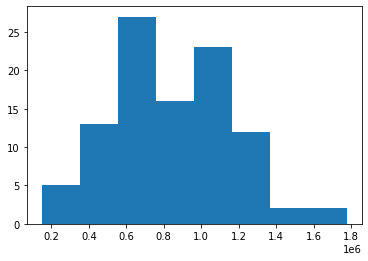

In [12]:
plt.hist(datosSimulacion , bins=k)

### analisis:

parece que los datos de utilidades de la muestra tienen un comportamiento aproximado a una distribucion normal, lo que por el teorema central del limite podemos asumir ya que el numero de muestras es lo suficientemente grande.



# 3. Calcule estadística descriptiva a las utilidades diarias obtenidas como: mínimo, máximo, media, mediana y desviación estándar e interprételas. 

#### procedemos con un analisis descriptivo de la simulacion sobre parametros como la media, el valor maximo y minimo de la utilidad

In [14]:
media = np.mean(datosSimulacion)
desviacionEstandar = np.std(datosSimulacion)
print('esta es la media estimada de la muestra: ', media, 'esta es la desviacion estandar',desviacionEstandar,', este es el valor maximo de la muestra: ', maximo, ', este es el valor minimo de la muestra: ', minimo)

esta es la media estimada de la muestra:  844793.7529703176 esta es la desviacion estandar 324220.4701951891 , este es el valor maximo de la muestra:  1775785.2456019304 , este es el valor minimo de la muestra:  151094.15476465796


### analisis:
Segun el valor minimo de la muestra podemos ver que almenos en esta muestra la utilidad no llega a ser negativa utilidades fue de  con este numero de reservas, en el resto de datos obtenidos no se les puede dar ningun analisis aparte de decir que tienen tal valor segun lo estimado desde la muestra. Para poder concluir algo certero de la simulacion, debemos encontrar un itervalo donde realemente encontremos el valor de los estadisticos que vamos a analizar.


# 4. Calcule un intervalo de confianza para el promedio de las utilidades diarias considerando un valor de significancia de 5%. 